# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">UTS Mechaine Learning</p>

### Nama :Andreas Hasiholan Sinaga
### NIM  :1103213033

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;"> About DataSet</p>

### Data Description

Dataset ini berisi tentang Evaluasi Mobil berasal dari model keputusan hierarki sederhana yang awalnya dikembangkan untuk demonstrasi DEX, M. Bohanec, V. Rajkovic: Sistem pakar untuk pengambilan keputusan. Sistemica 1(1), hal.145-157, 1990.). Model mengevaluasi mobil berdasarkan struktur konsep berikut:


| Column              | Description                                                         |
|---------------------|---------------------------------------------------                  |
| buying              | buying price                                                        |
| maint               | price of the maintenance                                            |
| Year                | Year the car was manufactured                                       |
| doors               | number of doors                                                     |
| persons             | capacity in terms of persons to carry                               |
| lug_boot            |the size of luggage boot                                             |
| safety              |estimated safety of the car                                          |
| class               | evaulation level (unacceptable, acceptable, good, very good)        |




# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">Explanatory Data Analysis dan Data Visualization</p>

In [ ]:
!pip install ucimlrepo

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">1.Importing Libraries</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">2. Loading and Inspecting Data</p>

In [ ]:
# Memuat dataset dari UC Irvine Machine Learning Repository
car_evaluation = fetch_ucirepo(id=19)

In [ ]:
# Data (sebagai pandas DataFrame)
X = car_evaluation.data.features
y = car_evaluation.data.targets

In [ ]:
# Mengonversi y menjadi Series jika perlu
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]  # Mengambil kolom pertama jika y adalah DataFrame

In [ ]:
# Pastikan y adalah pd.Series
y = pd.Series(y, name='target')

In [ ]:
# Menggabungkan fitur dan target untuk EDA
dataset = pd.concat([X, y], axis=1)

In [ ]:
# Menampilkan metadata dan informasi variabel
print("\nMetadata dari Dataset:")
print(car_evaluation.metadata)

print("\nInformasi Variabel:")
print(car_evaluation.variables)


Metadata dari Dataset:
{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems 

In [ ]:
# Melihat shape dari dataset
dataset_shape = dataset.shape
print(f"\nShape dari dataset: {dataset_shape}")


Shape dari dataset: (1728, 7)


In [ ]:
# Melihat statistical summary dari dataset
stat_summary = dataset.describe()
print("\nStatistical Summary dari Dataset:")
print(stat_summary)


Statistical Summary dari Dataset:
       buying  maint doors persons lug_boot safety target
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210


In [ ]:
# Menampilkan lima baris pertama dan lima baris terakhir
print("\nLima Baris Pertama:")
print(dataset.head(5))
print("\nLima Baris Terakhir:")
print(dataset.tail(5))


Lima Baris Pertama:
  buying  maint doors persons lug_boot safety target
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Lima Baris Terakhir:
     buying maint  doors persons lug_boot safety target
1723    low   low  5more    more      med    med   good
1724    low   low  5more    more      med   high  vgood
1725    low   low  5more    more      big    low  unacc
1726    low   low  5more    more      big    med   good
1727    low   low  5more    more      big   high  vgood


In [ ]:
# Menampilkan tipe data setiap kolom
print("\nTipe Data Kolom:")
print(dataset.dtypes)


Tipe Data Kolom:
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
target      object
dtype: object


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">3. Handling Missing and Duplicate Data</p>

In [ ]:
# Mengecek dan Menghapus Baris Duplikat
duplicate_rows = dataset[dataset.duplicated()]
print("\nJumlah Baris Duplikat yang Ditemukan:", duplicate_rows.shape[0])


Jumlah Baris Duplikat yang Ditemukan: 0


In [ ]:
# Menghapus baris duplikat
dataset = dataset.drop_duplicates()
print("\nJumlah Baris Setelah Menghapus Duplikat:", dataset.shape[0])


Jumlah Baris Setelah Menghapus Duplikat: 1728


In [ ]:
# Mengecek dan Menghapus Data yang Hilang (NaN)
print("\nJumlah Data Non-Null di Setiap Kolom:")
print(dataset.count())

print("\nJumlah Data yang Hilang di Setiap Kolom:")
print(dataset.isnull().sum())


Jumlah Data Non-Null di Setiap Kolom:
buying      1728
maint       1728
doors       1728
persons     1728
lug_boot    1728
safety      1728
target      1728
dtype: int64

Jumlah Data yang Hilang di Setiap Kolom:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64


In [ ]:
# Menghapus semua baris yang memiliki nilai NaN (jika ada)
dataset = dataset.dropna()
print("\nJumlah Baris Setelah Menghapus Data yang Hilang:", dataset.shape[0])


Jumlah Baris Setelah Menghapus Data yang Hilang: 1728


In [ ]:
# Memastikan tidak ada data yang hilang lagi
print("\nJumlah Data yang Hilang di Setiap Kolom Setelah Penghapusan:")
print(dataset.isnull().sum())


Jumlah Data yang Hilang di Setiap Kolom Setelah Penghapusan:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">4. Data Visualization</p>

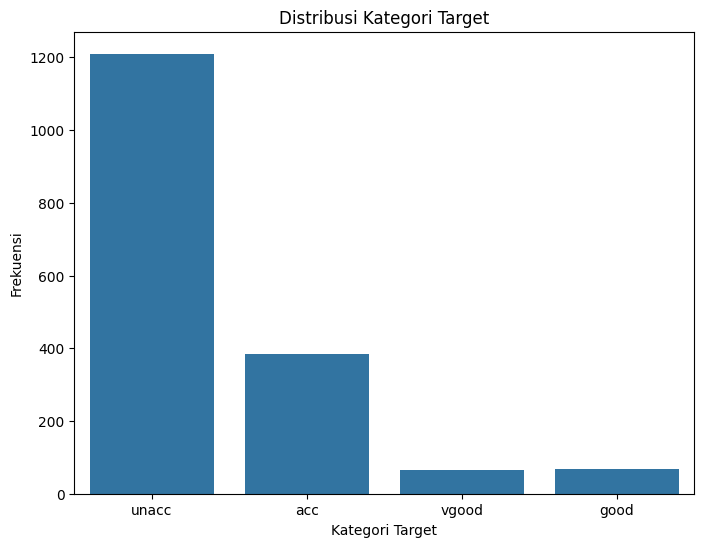

In [ ]:
# Barplot untuk Distribusi Target
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=dataset)
plt.title("Distribusi Kategori Target")
plt.xlabel("Kategori Target")
plt.ylabel("Frekuensi")
plt.show()

In [ ]:
# Boxplot untuk Distribusi Fitur Numerik (Jika Ada)
if not X.select_dtypes(include='number').empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=X.select_dtypes(include='number'))
    plt.title("Boxplot untuk Fitur Numerik (Jika Ada)")
    plt.show()

In [ ]:
# Pairplot untuk Hubungan Antar Fitur Numerik
if not X.select_dtypes(include='number').empty:
    sns.pairplot(X.select_dtypes(include='number'))
    plt.show()

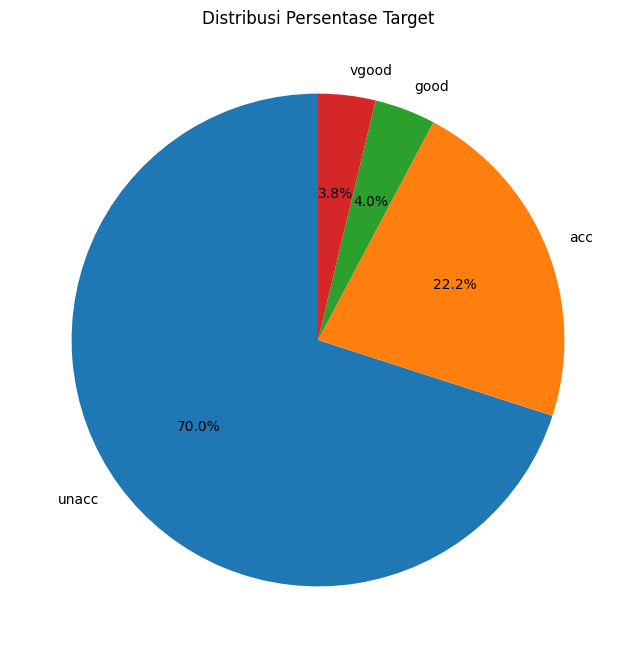

In [ ]:
# Pie Chart untuk Distribusi Target
target_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Persentase Target")
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">5. Categorical Data Visualization</p>

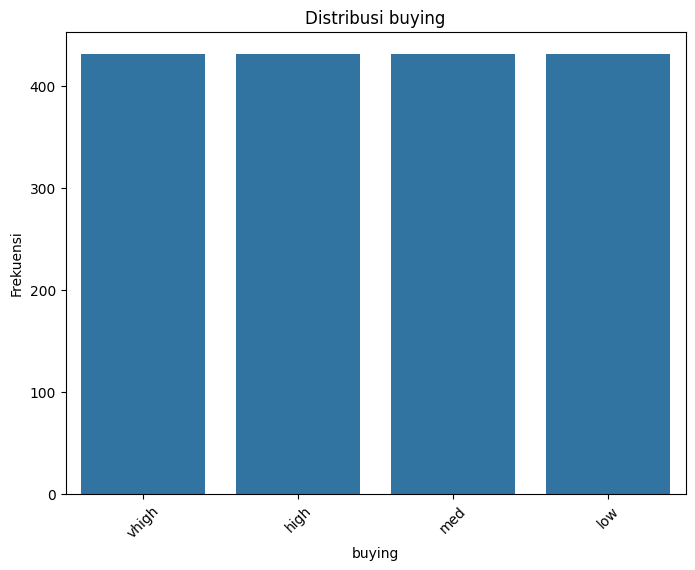

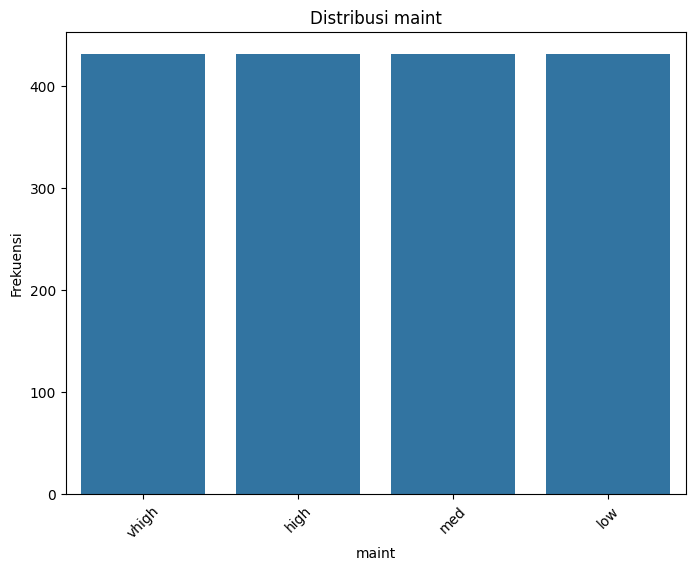

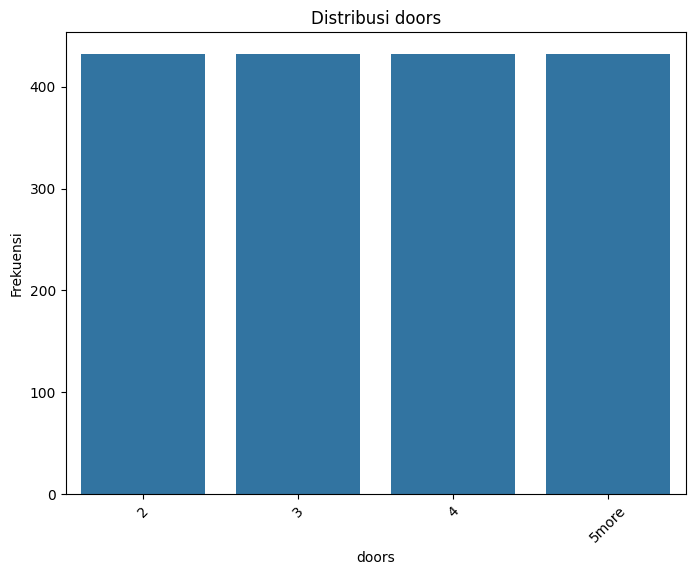

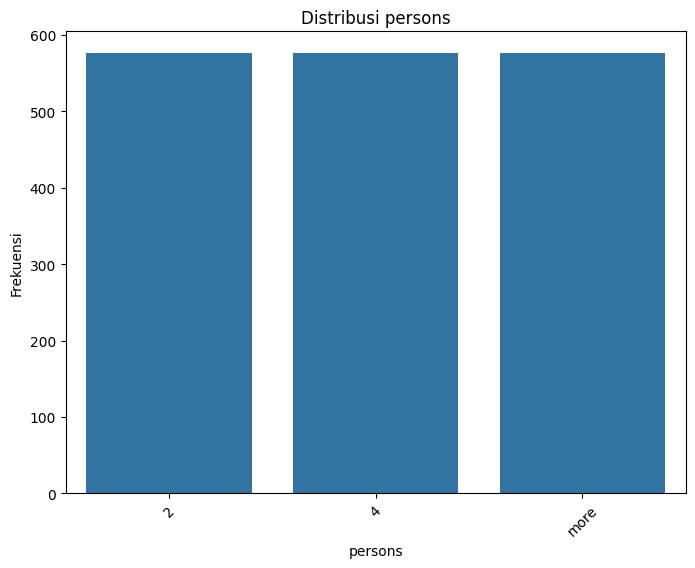

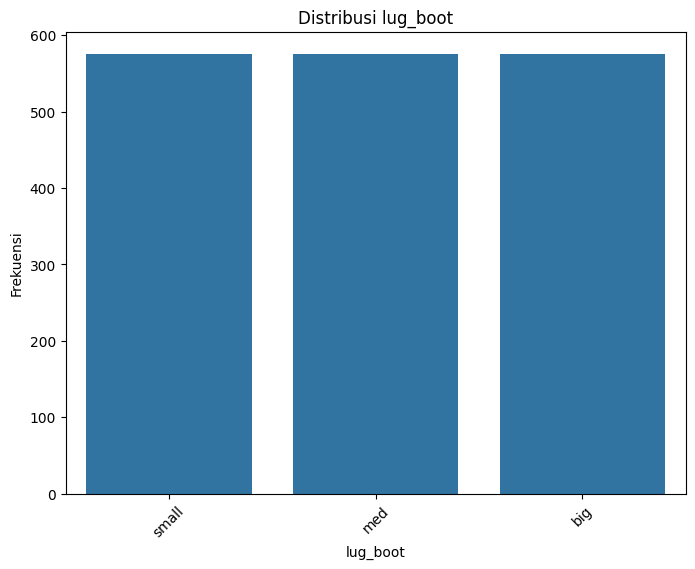

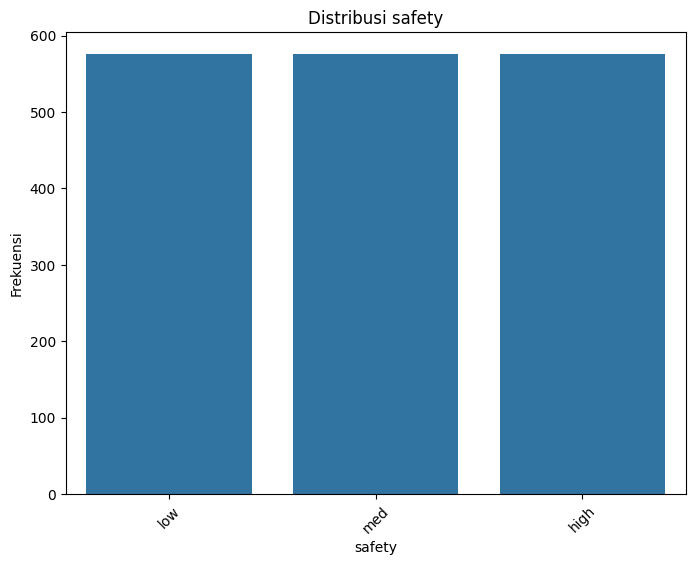

In [ ]:
# Barplot untuk Distribusi Fitur Kategorikal
for column in X.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=X)
    plt.title(f"Distribusi {column}")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.xticks(rotation=45)
    plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">6. Bivariate Analysis dengan Barplot</p>

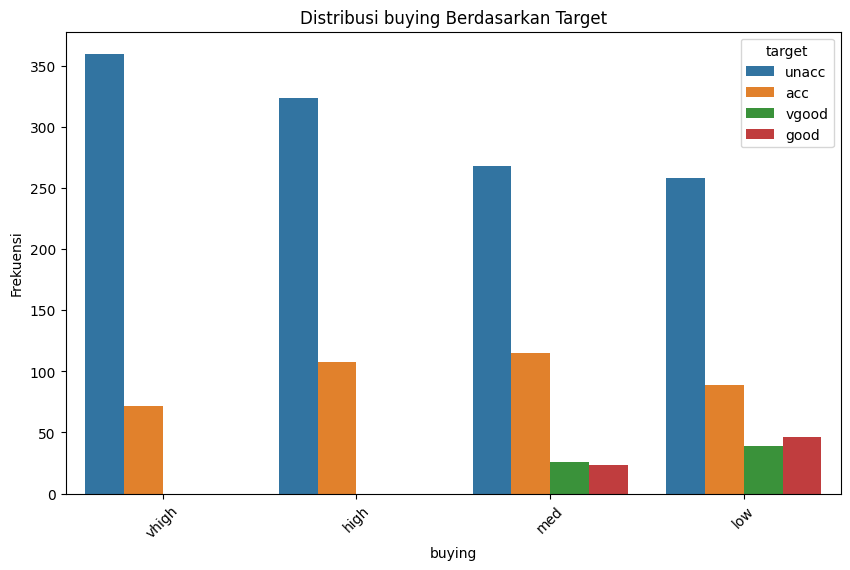

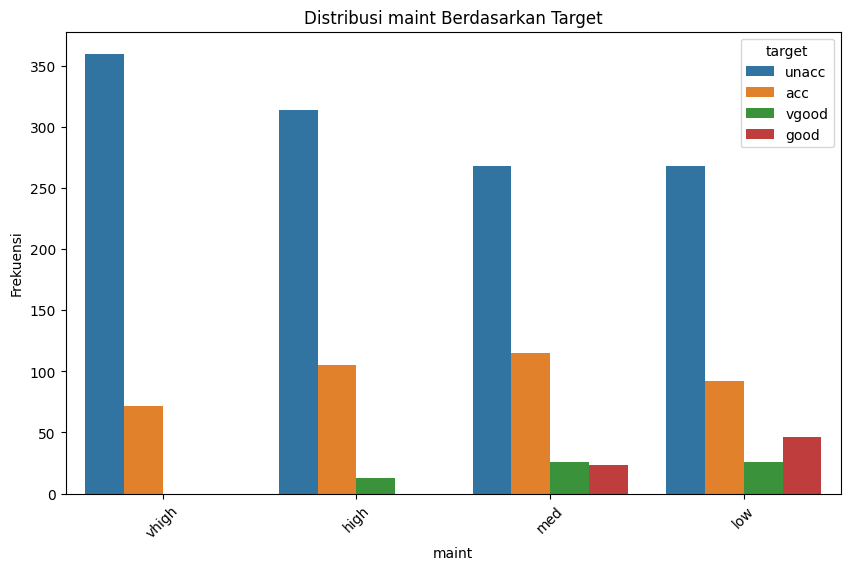

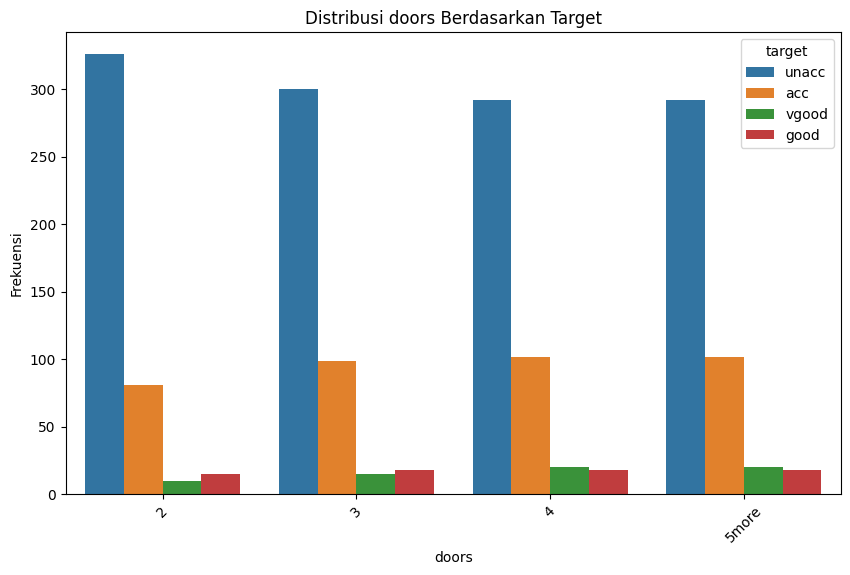

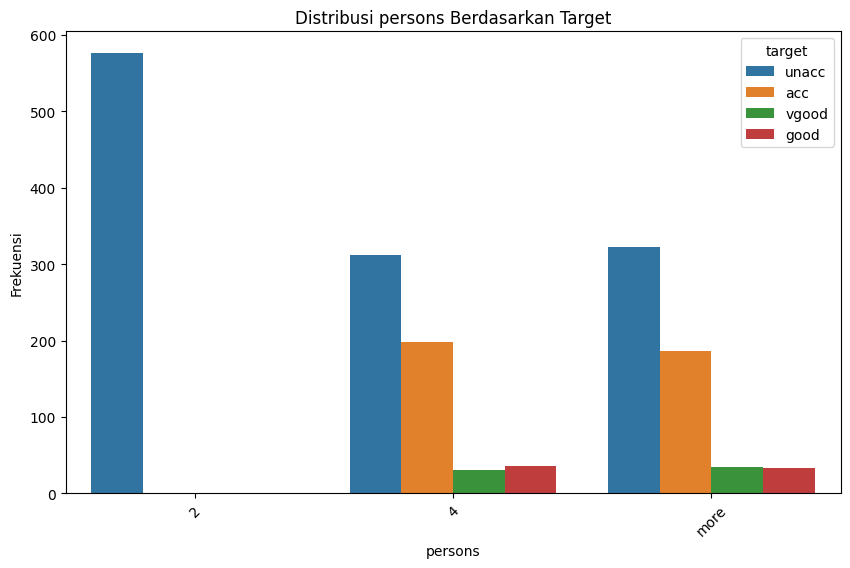

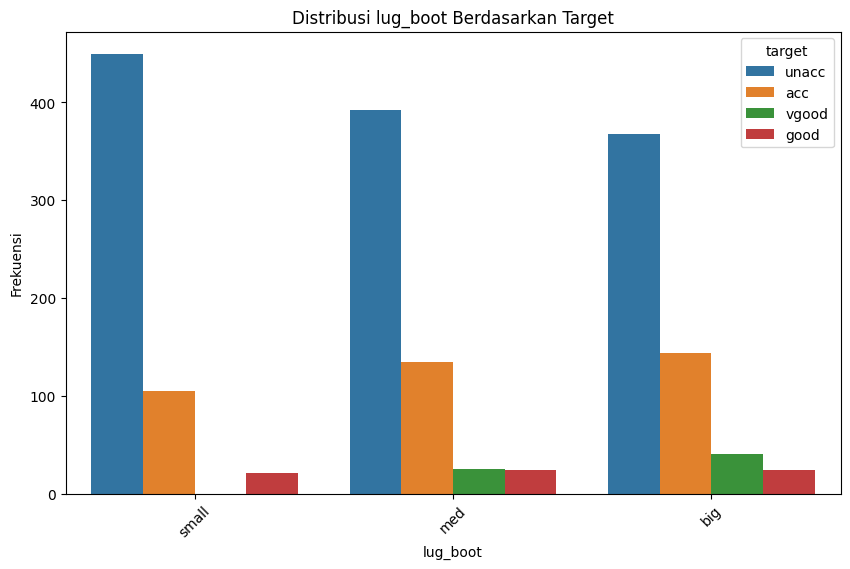

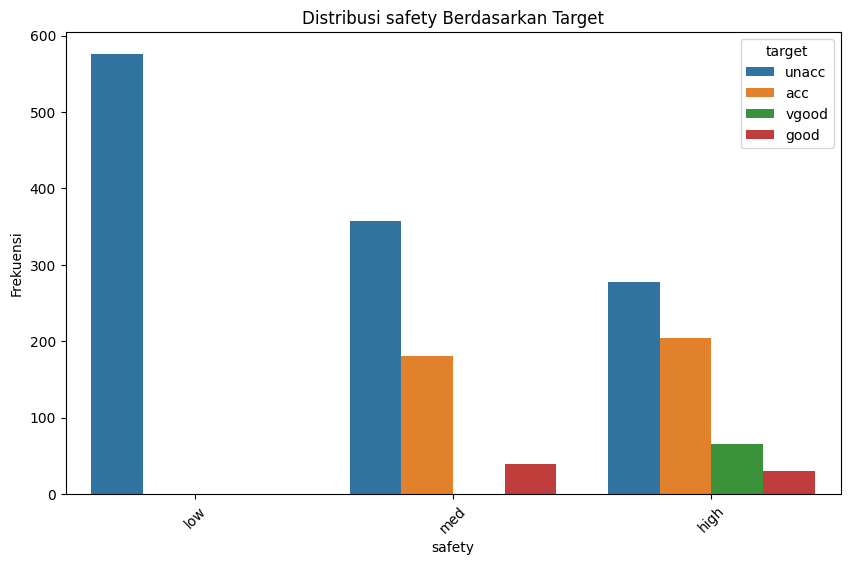

In [ ]:
# Melakukan analisis bivariate dengan barplot untuk fitur kategorikal berdasarkan target
for column in X.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='target', data=dataset)
    plt.title(f"Distribusi {column} Berdasarkan Target")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.xticks(rotation=45)
    plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">7. Bivariate Analysis dengan Boxplot</p>

In [ ]:
# Boxplot untuk memahami distribusi fitur numerik dalam kategori target
if not X.select_dtypes(include='number').empty:
    numeric_features = X.select_dtypes(include='number').columns
    for feature in numeric_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='target', y=feature, data=dataset)
        plt.title(f"Boxplot {feature} Berdasarkan Target")
        plt.xlabel("Target")
        plt.ylabel(feature)
        plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">8. Bivariate Analysis dengan Scatterplott</p>

In [ ]:
# Scatterplot untuk melihat hubungan antar fitur numerik (jika ada lebih dari satu fitur numerik)
if len(X.select_dtypes(include='number').columns) > 1:
    numeric_features = X.select_dtypes(include='number').columns
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=numeric_features[0], y=numeric_features[1], hue='target', data=dataset)
    plt.title(f"Scatterplot {numeric_features[0]} vs {numeric_features[1]} Berdasarkan Target")
    plt.xlabel(numeric_features[0])
    plt.ylabel(numeric_features[1])
    plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">Logistics regession</p>

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">1. Importing Libraries</p>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">2. One-Hot Encoding untuk Fitur Kategorikal</p>

In [ ]:
X_encoded = pd.get_dummies(X)  # Mengonversi fitur kategorikal menjadi numerik menggunakan One-Hot Encoding


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">3. Data Splitting</p>

In [ ]:
# Memisahkan dataset menjadi fitur (X_encoded) dan target (y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">4. Creating the Pipeline</p>

In [ ]:
# Membuat pipeline dengan Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Menstandarisasi fitur
    ('logistic_regression', LogisticRegression(max_iter=1000))  # Model Logistic Regression
])


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">5. Hyperparameter Tuning</p>

In [ ]:
# Menentukan parameter untuk hyperparameter tuning
param_grid = {
    'logistic_regression__C': [0.01, 0.1, 1, 10, 100],  # Parameter regularisasi
    'logistic_regression__solver': ['liblinear', 'saga'],  # Solver yang berbeda
    'logistic_regression__penalty': ['l1', 'l2'],  # Penalti L1 atau L2
}

In [ ]:
# Melakukan pencarian grid untuk hyperparameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l1, logistic_regression__solver=liblinear; total time=   0.0s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l1, logistic_regression__solver=liblinear; total time=   0.0s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l1, logistic_regression__solver=liblinear; total time=   0.1s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   0.2s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   0.0s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   0.1s
[CV] END logistic_regression__C=0.01, logistic_regression__penalty=l2, logistic_regression__solver=liblinear; total time=   0.1s
[CV] END logistic_regression__C=0.01, logistic_regr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=10, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=10, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=10, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   1.3s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=liblinear; total time=   0.0s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=liblinear; total time=   0.0s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=liblinear; total time=   0.0s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=saga; total time=   0.5s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=saga; total time=   0.5s
[CV] END logistic_regression__C=10, logistic_regression__penalty=l2, logistic_regression__solver=saga; total time=   0.5s
[CV] END logistic_regression__C=100, logistic_regression__penalty=l1, logistic_regression__solver=liblinear; total time=   1.5s
[CV

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=100, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=100, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=100, logistic_regression__penalty=l1, logistic_regression__solver=saga; total time=   1.0s
[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=liblinear; total time=   0.0s
[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=liblinear; total time=   0.0s
[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=liblinear; total time=   0.0s
[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=saga; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=saga; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logistic_regression__C=100, logistic_regression__penalty=l2, logistic_regression__solver=saga; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logistic_regression__C': [0.01, 0.1, 1, 10, 100],
                         'logistic_regression__penalty': ['l1', 'l2'],
                         'logistic_regression__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">6. Model Evaluation</p>

In [ ]:
# Menyimpan model terbaik dan mengevaluasinya
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("\nHyperparameter Terbaik:", grid_search.best_params_)
print("Accuracy:", accuracy)


Hyperparameter Terbaik: {'logistic_regression__C': 10, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'saga'}
Accuracy: 0.9364161849710982


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">7. Report</p>

In [ ]:
print("\nClassification Report:")
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         acc       0.91      0.83      0.87        83
        good       0.67      0.91      0.77        11
       unacc       0.96      0.97      0.97       235
       vgood       0.94      0.94      0.94        17

    accuracy                           0.94       346
   macro avg       0.87      0.91      0.89       346
weighted avg       0.94      0.94      0.94       346



# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">8. Confusion Matrix</p>

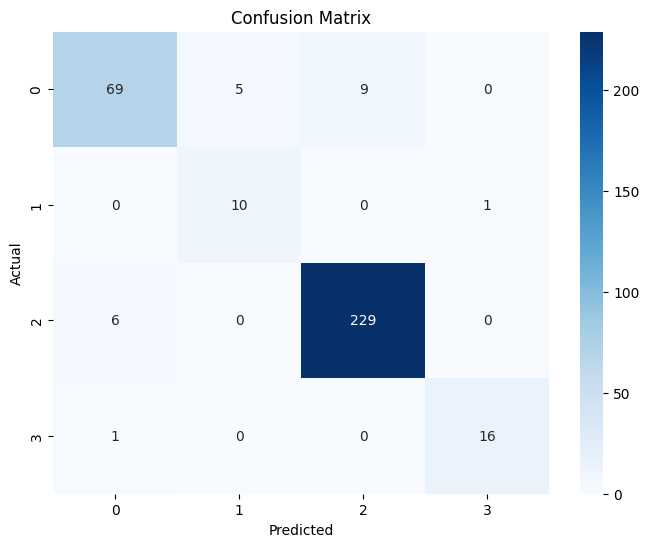

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">9. ROC Curve and AUC</p>

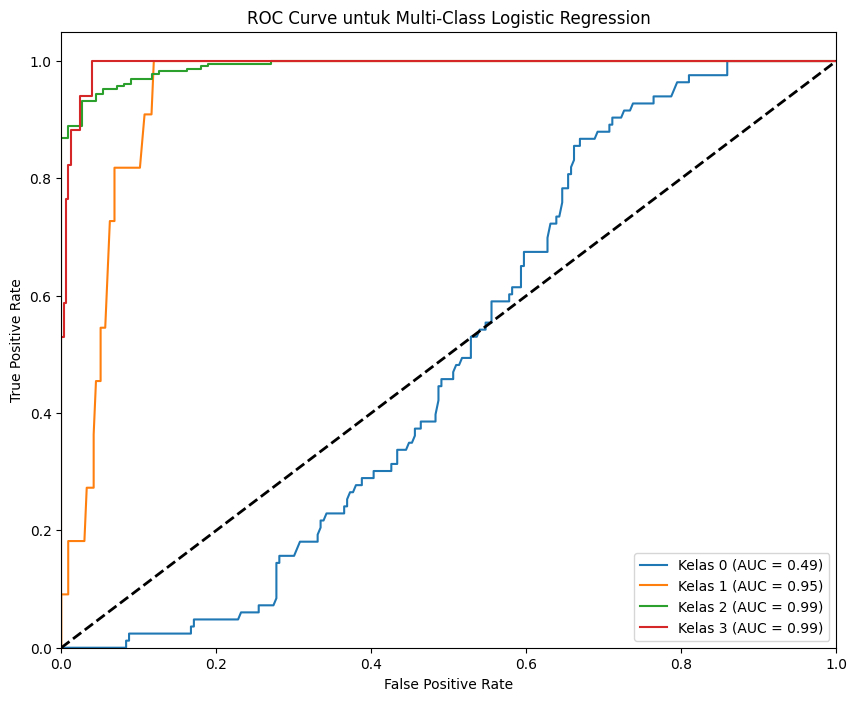

In [ ]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

y_score = best_model.decision_function(X_test)  # Menggunakan decision_function untuk mendapatkan probabilitas

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">Decision Tree</p>

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">1. Importing Libraries for Modeling</p>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">2. One-Hot Encoding untuk Fitur Kategorikal</p>

In [ ]:
X_encoded = pd.get_dummies(X)  # Mengonversi fitur kategorikal menjadi numerik menggunakan One-Hot Encoding

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">3. Data Splitting</p>

In [ ]:
# Memisahkan dataset menjadi fitur (X_encoded) dan target (y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">4. Creating the Pipeline</p>

In [ ]:
# Membuat pipeline dengan Decision Tree Classifier
pipeline = Pipeline([
    ('decision_tree', DecisionTreeClassifier())  # Model Decision Tree Classifier
])

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">5. Hyperparameter Tuning</p>

In [ ]:
# Menentukan parameter untuk hyperparameter tuning
param_grid = {
    'decision_tree__max_depth': [None, 5, 10, 20],  # Kedalaman maksimum pohon
    'decision_tree__min_samples_split': [2, 5, 10],  # Minimum sampel untuk membagi node
    'decision_tree__min_samples_leaf': [1, 2, 4],  # Minimum sampel per daun
    'decision_tree__criterion': ['gini', 'entropy']  # Kriteria untuk mengukur split
}

In [ ]:
# Melakukan pencarian grid untuk hyperparameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=2; total time=   0.0s
[CV] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=2; total time=   0.0s
[CV] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=2; total time=   0.0s
[CV] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=5; total time=   0.0s
[CV] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_split=5; total time=   0.0s
[CV] END decision_tree__criterion=gini, decision_tree__max_depth=None, decision_tree__min_samples_leaf=1, decision_tree__min_samples_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('decision_tree',
                                        DecisionTreeClassifier())]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [None, 5, 10, 20],
                         'decision_tree__min_samples_leaf': [1, 2, 4],
                         'decision_tree__min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">6. Model Evaluation</p>

In [ ]:
# Menyimpan model terbaik dan mengevaluasinya
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("\nHyperparameter Terbaik:", grid_search.best_params_)
print("Accuracy:", accuracy)


Hyperparameter Terbaik: {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': None, 'decision_tree__min_samples_leaf': 1, 'decision_tree__min_samples_split': 2}
Accuracy: 0.9624277456647399


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">7. Report</p>

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         acc       0.99      0.89      0.94        83
        good       0.67      0.91      0.77        11
       unacc       0.98      1.00      0.99       235
       vgood       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.97      0.96      0.96       346



# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">8. Confusion Matrix</p>

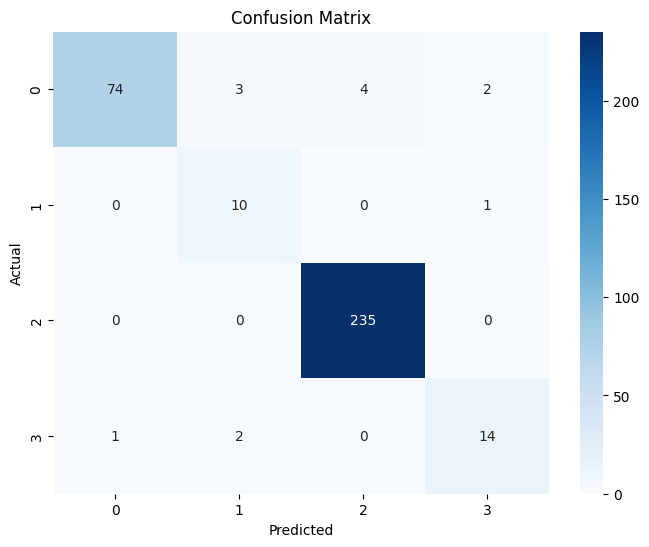

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">9. ROC Curve and AUC</p>

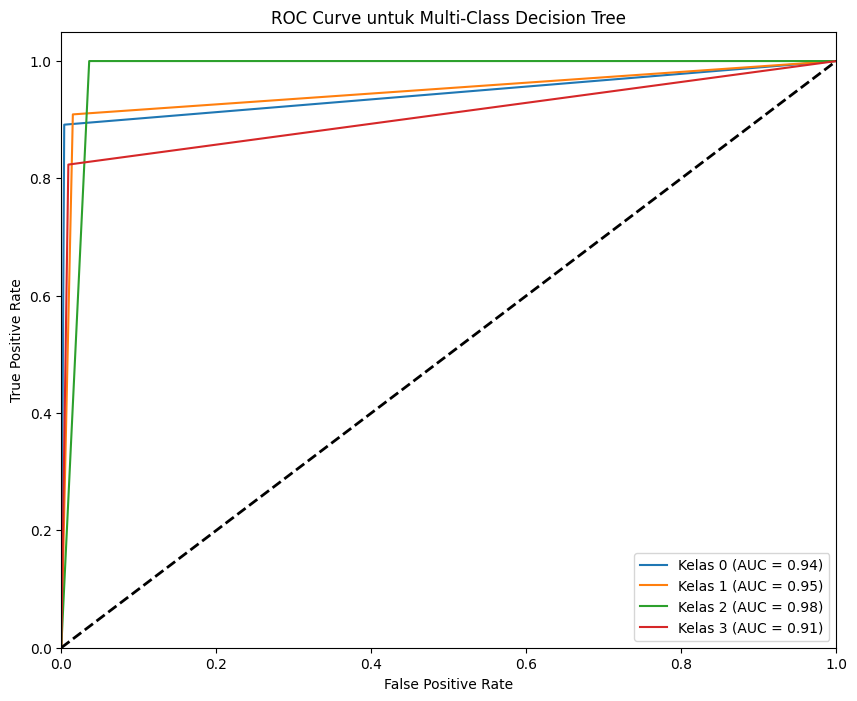

In [ ]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

# Menggunakan predict_proba untuk mendapatkan probabilitas dari Decision Tree
y_score = best_model.named_steps['decision_tree'].predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class Decision Tree')
plt.legend(loc='lower right')
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">k-Nearest Neighbors (k-NN)</p>


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">1. Importing Libraries</p>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">2. One-Hot Encoding untuk Fitur Kategorikal</p>


In [ ]:
X_encoded = pd.get_dummies(X)  # Mengonversi fitur kategorikal menjadi numerik menggunakan One-Hot Encoding


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">3. Data Splitting</p>

In [ ]:
# Memisahkan dataset menjadi fitur (X_encoded) dan target (y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">4. Creating the Pipeline</p>

In [ ]:
# Membuat pipeline dengan k-NN Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Menstandarisasi fitur
    ('knn', KNeighborsClassifier())  # Model k-NN Classifier
])

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">5. Hyperparameter Tuning</p>

In [ ]:
# Menentukan parameter untuk hyperparameter tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],  # Jumlah tetangga
    'knn__weights': ['uniform', 'distance'],  # Bobot sampel: uniform atau berbasis jarak
    'knn__p': [1, 2]  # Parameter untuk jarak Minkowski: 1 untuk jarak Manhattan, 2 untuk jarak Euclidean
}

In [ ]:
# Melakukan pencarian grid untuk hyperparameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.1s
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.1s
[CV] END .knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.1s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END .knn__n_neighbors=3, knn__p=2, knn__weights=uniform; total time=   0.0s
[CV] END .knn__n_neighbors=3, knn__p=2, knn__weights=uniform; total time=   0.0s
[CV] END .knn__n_neighbors=3, knn__p=2, knn__weights=uniform; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=2, knn__weights=distance; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=2, knn__weights=distance; total time=   0.0s
[CV] END knn__n_neighbors=3, knn__p=2, knn__weig

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 10], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">6. Model Evaluation</p>

In [ ]:
# Menyimpan model terbaik dan mengevaluasinya
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("\nHyperparameter Terbaik:", grid_search.best_params_)
print("Accuracy:", accuracy)


Hyperparameter Terbaik: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'}
Accuracy: 0.8930635838150289


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">7. Report</p>

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         acc       0.87      0.72      0.79        83
        good       0.55      0.55      0.55        11
       unacc       0.91      1.00      0.95       235
       vgood       0.90      0.53      0.67        17

    accuracy                           0.89       346
   macro avg       0.81      0.70      0.74       346
weighted avg       0.89      0.89      0.89       346



# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">8. Confusion Matrix</p>

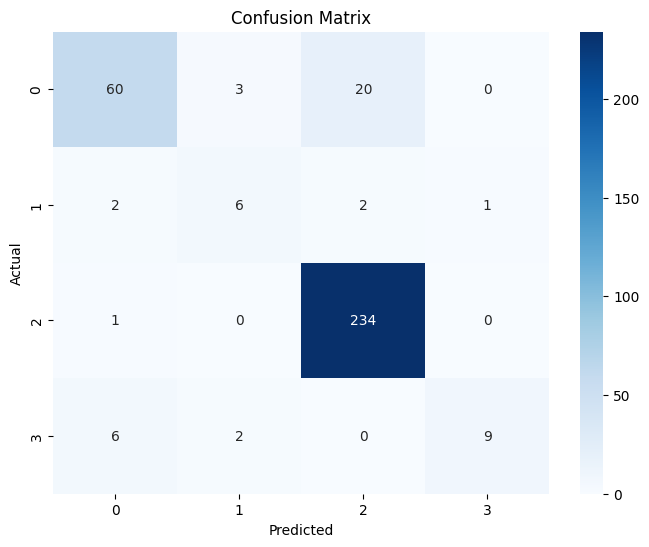

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">9. ROC Curve and AUC</p>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


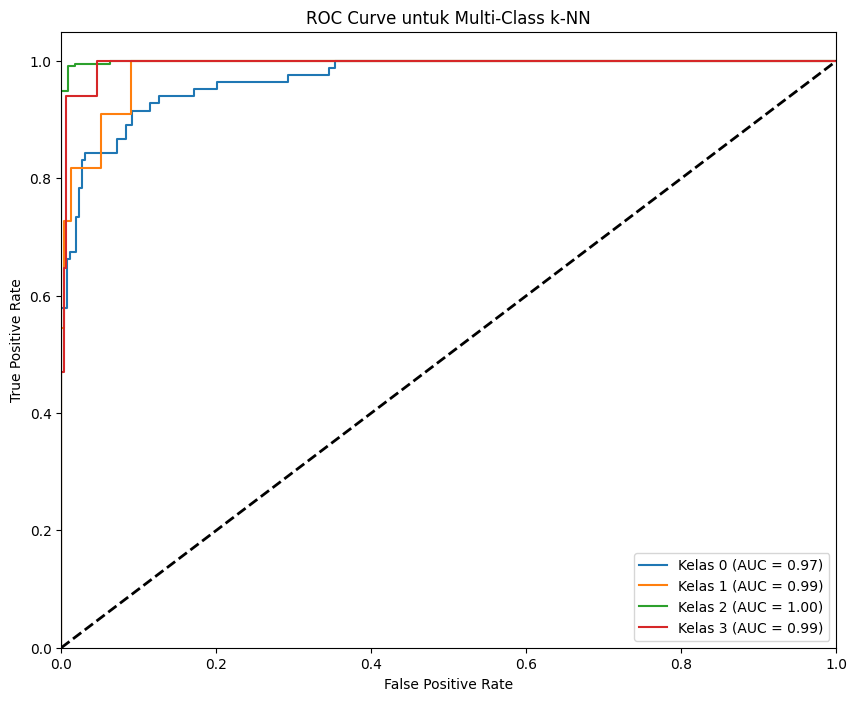

In [ ]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

# Menggunakan predict_proba untuk mendapatkan probabilitas dari k-NN
y_score = best_model.named_steps['knn'].predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class k-NN')
plt.legend(loc='lower right')
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">XGBoost Classfication</p>

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">1. Importing Libraries</p>

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">2. One-Hot Encoding untuk Fitur Kategorikal</p>

In [ ]:
X_encoded = pd.get_dummies(X)  # Mengonversi fitur kategorikal menjadi numerik menggunakan One-Hot Encoding


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">3. Mengonversi Label Target ke Format Numerik</p>

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengonversi label string ke angka


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">4. Data Splitting</p>

In [ ]:
# Memisahkan dataset menjadi fitur (X_encoded) dan target (y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">5. Creating the Pipeline</p>

In [ ]:
# Membuat pipeline dengan XGBoost Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Menstandarisasi fitur
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))  # Model XGBoost Classifier
])

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">6. Hyperparameter Tuning</p>

In [ ]:
# Menentukan parameter untuk hyperparameter tuning
param_grid = {
    'xgb__n_estimators': [100, 200],  # Jumlah estimator
    'xgb__max_depth': [3, 5, 7],  # Kedalaman maksimum pohon
    'xgb__learning_rate': [0.01, 0.1, 0.2],  # Kecepatan pembelajaran
    'xgb__subsample': [0.8, 1.0],  # Proporsi sampel yang digunakan untuk setiap pohon
    'xgb__colsample_bytree': [0.8, 1.0]  # Proporsi kolom yang digunakan untuk setiap pohon
}

In [ ]:
# Melakukan pencarian grid untuk hyperparameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=0.8, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   1.0s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.01, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.1, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=3, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=5, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.2s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s
[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=100, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END xgb__colsample_bytree=1.0, xgb__learning_rate=0.2, xgb__max_depth=7, xgb__n_estimators=200, xgb__subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:43:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='mlogloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_t...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__colsample_bytree': [0.8, 1.0],
                         'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [100, 200],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">7. Model Evaluation</p>

In [ ]:
# Menyimpan model terbaik dan mengevaluasinya
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print("\nHyperparameter Terbaik:", grid_search.best_params_)
print("Accuracy:", accuracy)


Hyperparameter Terbaik: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__subsample': 1.0}
Accuracy: 0.9739884393063584


# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">8. Report</p>

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        83
           1       0.58      1.00      0.73        11
           2       1.00      1.00      1.00       235
           3       1.00      0.88      0.94        17

    accuracy                           0.97       346
   macro avg       0.89      0.95      0.91       346
weighted avg       0.98      0.97      0.98       346



# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">9. Confusion Matrix</p>

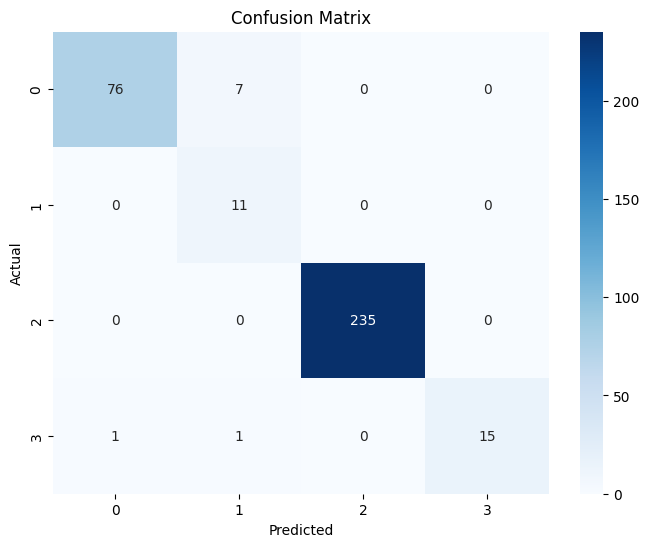

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:80%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">10. ROC Curve and AUC</p>

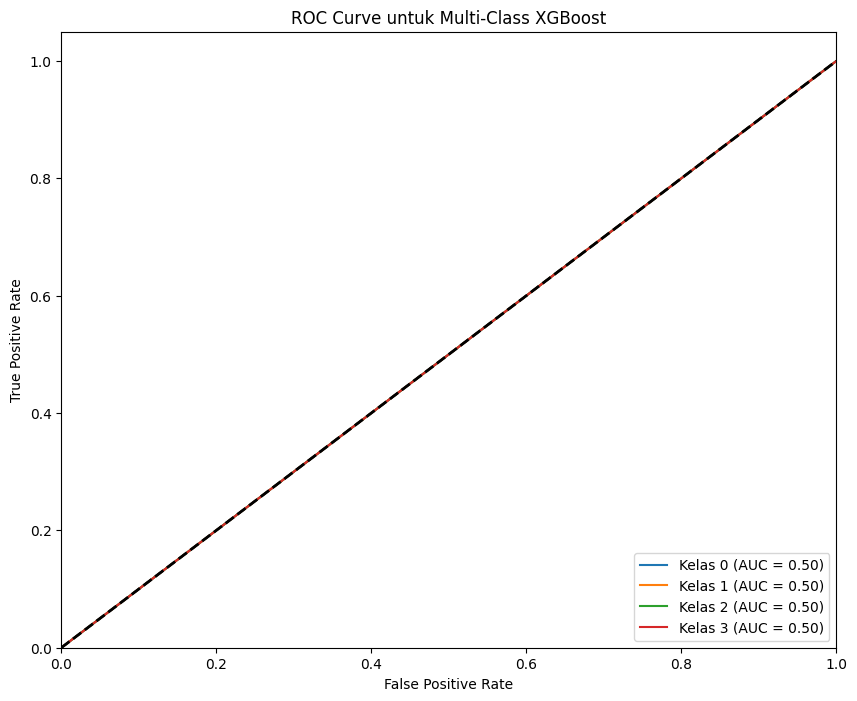

In [ ]:
# Binarize y_test untuk multi-class ROC
y_binarized = label_binarize(y_test, classes=np.unique(y_encoded))
n_classes = y_binarized.shape[1]

# Menghitung ROC Curve dan AUC untuk setiap kelas
fpr = {}
tpr = {}
roc_auc = {}

# Menggunakan predict_proba untuk mendapatkan probabilitas dari XGBoost
y_score = best_model.named_steps['xgb'].predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Multi-Class XGBoost')
plt.legend(loc='lower right')
plt.show()